In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/110下_深度學習/DL_HW1/stanford_dogs_dataset.zip

Archive:  /content/drive/MyDrive/110下_深度學習/DL_HW1/stanford_dogs_dataset.zip
replace stanford_dogs_dataset/test/Afghan_hound/n02088094_1003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# 1. Please implement a CNN for image recognition by using Stanford Dogs Dataset,then plot the learning curve and the accuracy rate of training and test data. (20%)

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
from torch.utils.data import ConcatDataset, DataLoader, Subset
from torchvision.datasets import DatasetFolder
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [21]:
train_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])


In [22]:
batch_size = 128

train_set = DatasetFolder("/content/stanford_dogs_dataset/train", loader=lambda x: Image.open(x), extensions="jpg", transform=train_transform)
test_set = DatasetFolder("/content/stanford_dogs_dataset/test", loader=lambda x: Image.open(x), extensions="jpg", transform=test_transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)


In [16]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(4, 4, 0),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 8 * 8, 256),
            nn.ReLU(),
#             nn.Linear(256, 256),
#             nn.ReLU(),
            nn.Linear(256, 11)
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.flatten(1)
        x = self.fc_layers(x)
        return x


In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print('device: ',device)

model = Classifier().to(device)
model.device = device

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-5)
n_epochs = 80

train_loss_record = []
test_loss_record = []
train_acc_record = []
test_acc_record = []

for epoch in range(n_epochs):
    # Training
    model.train()

    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        imgs, labels = batch
        logits = model(imgs.to(device))
        loss = criterion(logits, labels.to(device))

        optimizer.zero_grad()
        loss.backward()
        grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=10)
        optimizer.step()

        acc = (logits.argmax(dim=-1) == labels.to(device)).float().mean()

        train_loss.append(loss.item())
        train_accs.append(acc)

    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_record.append(train_loss)
    train_acc_record.append(train_acc)

    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] loss = {train_loss:.5f}, acc = {train_acc:.5f}")

    #Testing
    model.eval()

    test_loss = []
    test_accs = []

    for batch in tqdm(test_loader):
        imgs, labels = batch
        with torch.no_grad():
          logits = model(imgs.to(device))

        loss = criterion(logits, labels.to(device))
        acc = (logits.argmax(dim=-1) == labels.to(device)).float().mean()

        test_loss.append(loss.item())
        test_accs.append(acc)

    test_loss = sum(test_loss) / len(test_loss)
    test_acc = sum(test_accs) / len(test_accs)
    test_loss_record.append(test_loss)
    test_acc_record.append(test_acc)

    print(f"[ Test | {epoch + 1:03d}/{n_epochs:03d} ] loss = {test_loss:.5f}, acc = {test_acc:.5f}")


device:  cuda


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 001/080 ] loss = 3.85815, acc = 0.14796


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 001/080 ] loss = 2.12051, acc = 0.10417


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 002/080 ] loss = 2.14555, acc = 0.25237


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 002/080 ] loss = 2.50576, acc = 0.09635


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 003/080 ] loss = 1.74256, acc = 0.37382


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 003/080 ] loss = 2.07242, acc = 0.16406


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 004/080 ] loss = 1.46036, acc = 0.48414


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 004/080 ] loss = 1.93014, acc = 0.30208


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 005/080 ] loss = 1.31257, acc = 0.53456


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 005/080 ] loss = 1.68466, acc = 0.27604


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 006/080 ] loss = 1.16018, acc = 0.58996


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 006/080 ] loss = 1.57051, acc = 0.40625


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 007/080 ] loss = 1.04955, acc = 0.65152


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 007/080 ] loss = 1.44788, acc = 0.43490


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 008/080 ] loss = 0.91929, acc = 0.69697


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 008/080 ] loss = 1.46100, acc = 0.44792


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 009/080 ] loss = 0.82990, acc = 0.72846


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 009/080 ] loss = 1.59250, acc = 0.42448


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 010/080 ] loss = 0.70502, acc = 0.77107


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 010/080 ] loss = 1.39977, acc = 0.50521


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 011/080 ] loss = 0.61004, acc = 0.80895


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 011/080 ] loss = 1.48690, acc = 0.47917


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 012/080 ] loss = 0.52666, acc = 0.83499


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 012/080 ] loss = 1.61813, acc = 0.48958


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 013/080 ] loss = 0.47880, acc = 0.85795


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 013/080 ] loss = 1.58525, acc = 0.47135


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 014/080 ] loss = 0.36871, acc = 0.90743


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 014/080 ] loss = 1.49556, acc = 0.50521


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 015/080 ] loss = 0.29216, acc = 0.94271


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 015/080 ] loss = 1.71182, acc = 0.42708


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 016/080 ] loss = 0.26024, acc = 0.94886


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 016/080 ] loss = 1.56060, acc = 0.51562


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 017/080 ] loss = 0.20475, acc = 0.96851


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 017/080 ] loss = 1.60484, acc = 0.53125


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 018/080 ] loss = 0.18556, acc = 0.96117


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 018/080 ] loss = 1.71115, acc = 0.47135


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 019/080 ] loss = 0.14248, acc = 0.98887


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 019/080 ] loss = 1.67760, acc = 0.51302


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 020/080 ] loss = 0.11140, acc = 0.99574


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 020/080 ] loss = 1.74265, acc = 0.45573


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 021/080 ] loss = 0.08921, acc = 0.99645


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 021/080 ] loss = 1.85904, acc = 0.44010


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 022/080 ] loss = 0.07241, acc = 0.99858


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 022/080 ] loss = 1.66748, acc = 0.49479


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 023/080 ] loss = 0.05742, acc = 0.99929


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 023/080 ] loss = 1.72436, acc = 0.47396


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 024/080 ] loss = 0.04593, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 024/080 ] loss = 1.70198, acc = 0.49219


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 025/080 ] loss = 0.03875, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 025/080 ] loss = 1.86429, acc = 0.44271


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 026/080 ] loss = 0.03239, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 026/080 ] loss = 1.70423, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 027/080 ] loss = 0.02762, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 027/080 ] loss = 1.75850, acc = 0.50260


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 028/080 ] loss = 0.02549, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 028/080 ] loss = 1.78856, acc = 0.46094


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 029/080 ] loss = 0.02490, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 029/080 ] loss = 1.85353, acc = 0.49479


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 030/080 ] loss = 0.02394, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 030/080 ] loss = 1.71122, acc = 0.53646


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 031/080 ] loss = 0.01962, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 031/080 ] loss = 1.83884, acc = 0.50260


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 032/080 ] loss = 0.01712, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 032/080 ] loss = 1.79444, acc = 0.50521


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 033/080 ] loss = 0.01533, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 033/080 ] loss = 1.79526, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 034/080 ] loss = 0.01465, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 034/080 ] loss = 1.77110, acc = 0.51823


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 035/080 ] loss = 0.01275, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 035/080 ] loss = 1.88558, acc = 0.48958


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 036/080 ] loss = 0.01289, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 036/080 ] loss = 1.77848, acc = 0.52083


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 037/080 ] loss = 0.01224, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 037/080 ] loss = 1.88664, acc = 0.49219


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 038/080 ] loss = 0.01155, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 038/080 ] loss = 1.81954, acc = 0.50260


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 039/080 ] loss = 0.01024, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 039/080 ] loss = 1.91882, acc = 0.48958


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 040/080 ] loss = 0.00953, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 040/080 ] loss = 1.81183, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 041/080 ] loss = 0.00891, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 041/080 ] loss = 1.90499, acc = 0.48958


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 042/080 ] loss = 0.00819, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 042/080 ] loss = 1.85752, acc = 0.50521


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 043/080 ] loss = 0.00808, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 043/080 ] loss = 1.85720, acc = 0.48698


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 044/080 ] loss = 0.00825, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 044/080 ] loss = 1.91679, acc = 0.50000


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 045/080 ] loss = 0.00821, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 045/080 ] loss = 1.82653, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 046/080 ] loss = 0.00751, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 046/080 ] loss = 1.94026, acc = 0.51823


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 047/080 ] loss = 0.00697, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 047/080 ] loss = 1.86815, acc = 0.48958


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 048/080 ] loss = 0.00653, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 048/080 ] loss = 1.94831, acc = 0.48698


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 049/080 ] loss = 0.00646, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 049/080 ] loss = 1.87597, acc = 0.50521


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 050/080 ] loss = 0.00547, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 050/080 ] loss = 1.91975, acc = 0.50000


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 051/080 ] loss = 0.00542, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 051/080 ] loss = 1.91215, acc = 0.50260


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 052/080 ] loss = 0.00514, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 052/080 ] loss = 1.90776, acc = 0.51302


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 053/080 ] loss = 0.00514, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 053/080 ] loss = 1.93002, acc = 0.49740


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 054/080 ] loss = 0.00494, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 054/080 ] loss = 1.95510, acc = 0.48958


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 055/080 ] loss = 0.00493, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 055/080 ] loss = 1.95661, acc = 0.49479


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 056/080 ] loss = 0.00424, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 056/080 ] loss = 1.92452, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 057/080 ] loss = 0.00442, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 057/080 ] loss = 1.90798, acc = 0.51042


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 058/080 ] loss = 0.00431, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 058/080 ] loss = 1.98053, acc = 0.50000


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 059/080 ] loss = 0.00393, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 059/080 ] loss = 1.95079, acc = 0.50260


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 060/080 ] loss = 0.00378, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 060/080 ] loss = 1.93725, acc = 0.51562


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 061/080 ] loss = 0.00379, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 061/080 ] loss = 1.96021, acc = 0.51302


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 062/080 ] loss = 0.00371, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 062/080 ] loss = 1.96570, acc = 0.49740


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 063/080 ] loss = 0.00358, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 063/080 ] loss = 1.95574, acc = 0.51302


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 064/080 ] loss = 0.00330, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 064/080 ] loss = 1.94521, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 065/080 ] loss = 0.00328, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 065/080 ] loss = 1.96250, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 066/080 ] loss = 0.00317, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 066/080 ] loss = 1.98331, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 067/080 ] loss = 0.00315, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 067/080 ] loss = 1.97720, acc = 0.50000


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 068/080 ] loss = 0.00307, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 068/080 ] loss = 1.97128, acc = 0.50000


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 069/080 ] loss = 0.00278, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 069/080 ] loss = 2.00822, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 070/080 ] loss = 0.00257, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 070/080 ] loss = 1.99643, acc = 0.51042


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 071/080 ] loss = 0.00265, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 071/080 ] loss = 1.97394, acc = 0.51042


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 072/080 ] loss = 0.00279, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 072/080 ] loss = 2.00157, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 073/080 ] loss = 0.00262, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 073/080 ] loss = 1.99640, acc = 0.50000


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 074/080 ] loss = 0.00255, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 074/080 ] loss = 1.98121, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 075/080 ] loss = 0.00244, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 075/080 ] loss = 2.02395, acc = 0.50781


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 076/080 ] loss = 0.00245, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 076/080 ] loss = 2.03064, acc = 0.51302


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 077/080 ] loss = 0.00239, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 077/080 ] loss = 2.01161, acc = 0.48438


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 078/080 ] loss = 0.00225, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 078/080 ] loss = 2.03577, acc = 0.50000


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 079/080 ] loss = 0.00223, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 079/080 ] loss = 2.00679, acc = 0.51302


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 080/080 ] loss = 0.00216, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 080/080 ] loss = 2.00661, acc = 0.51042


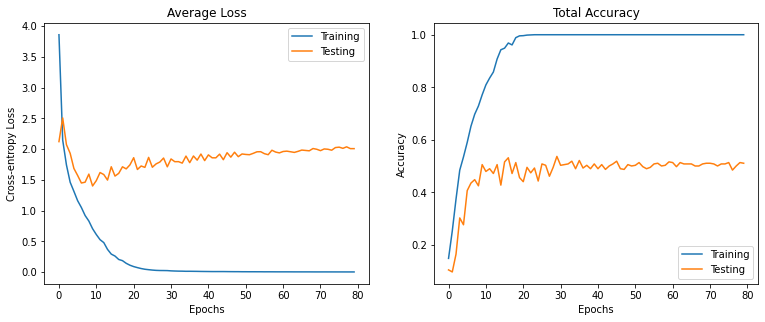

In [18]:
def plot_result(config, train_loss_record, test_loss_record, train_acc_record, test_acc_record):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6.4*2, 4.8))
    axes = axes.flatten()

    axes[0].set_title('Average Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Cross-entropy Loss')
    axes[0].plot(train_loss_record, label='Training')
    axes[0].plot(test_loss_record, label='Testing')
    axes[0].legend()

    axes[1].set_title('Total Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].plot(train_acc_record, label='Training')
    axes[1].plot(test_acc_record, label='Testing')
    axes[1].legend()

    plt.show()

    return 

config = None
for i in range(len(train_acc_record)):
    train_acc_record[i] = train_acc_record[i].item()
    test_acc_record[i] = test_acc_record[i].item()

plot_result(config, train_loss_record, test_loss_record, train_acc_record, test_acc_record)


# 2. In order to deal with a real-world problem, we may stack some additional layers in the Deep Neural Network which results in the improved accuracy and performance. But it has been found that there is a maximum threshold for depth with the traditional convolutional neural network model. The problem of training a very deep network has been alleviated with the introduction of ResNet or residual network.


## (a) Construct a ResNet with residual blocks for image recognition and plot the learning curve, accuracy rate, try to stack more blocks as you can (ResNet-18 is recommended), you can refer to the paper for implementation.


In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResNetBlock(nn.Module):
    def __init__(self, in_ch, out_ch, stride=1):
        super(ResNetBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_ch)
        )
        self.identity_mapping = nn.Sequential()
        # 每兩層Conv2d做一次identity_mapping
        if stride != 1 or in_ch != out_ch:
            self.identity_mapping = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_ch)
            )

    def forward(self, x):
        out = self.block(x)
        out += self.identity_mapping(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, ResNetBlock, num_classes=10):
        super(ResNet, self).__init__()
        self.in_ch = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        self.layer1 = self.make_layer(ResNetBlock, 64,  2, stride=1)
        self.layer2 = self.make_layer(ResNetBlock, 128, 2, stride=2)
        self.layer3 = self.make_layer(ResNetBlock, 256, 2, stride=2)
        self.layer4 = self.make_layer(ResNetBlock, 512, 2, stride=2)
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)   #strides=[1,1]
        layers = []
        for stride in strides:
            layers.append(block(self.in_ch, channels, stride))
            self.in_ch = channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


def ResNet18():

    return ResNet(ResNetBlock)

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print('device: ',device)

resnet18 = ResNet18().to(device)
resnet18.device = device

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.0003, weight_decay=1e-5)

n_epochs = 80

train_loss_record = []
test_loss_record = []
train_acc_record = []
test_acc_record = []

for epoch in range(n_epochs):

    # Training
    resnet18.train()

    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        imgs, labels = batch
        logits = resnet18(imgs.to(device))
        loss = criterion(logits, labels.to(device))

        optimizer.zero_grad()
        loss.backward()
        grad_norm = nn.utils.clip_grad_norm_(resnet18.parameters(), max_norm=10)
        optimizer.step()

        acc = (logits.argmax(dim=-1) == labels.to(device)).float().mean()

        train_loss.append(loss.item())
        train_accs.append(acc)

    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_record.append(train_loss)
    train_acc_record.append(train_acc)

    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] loss = {train_loss:.5f}, acc = {train_acc:.5f}")

    # Testing
    resnet18.eval()

    test_loss = []
    test_accs = []

    for batch in tqdm(test_loader):
        imgs, labels = batch
        with torch.no_grad():
          logits = resnet18(imgs.to(device))

        loss = criterion(logits, labels.to(device))
        acc = (logits.argmax(dim=-1) == labels.to(device)).float().mean()

        test_loss.append(loss.item())
        test_accs.append(acc)

    test_loss = sum(test_loss) / len(test_loss)
    test_acc = sum(test_accs) / len(test_accs)
    test_loss_record.append(test_loss)
    test_acc_record.append(test_acc)

    print(f"[ Test | {epoch + 1:03d}/{n_epochs:03d} ] loss = {test_loss:.5f}, acc = {test_acc:.5f}")


device:  cuda


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 001/080 ] loss = 2.04236, acc = 0.25284


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 001/080 ] loss = 2.40018, acc = 0.09375


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 002/080 ] loss = 1.31447, acc = 0.55469


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 002/080 ] loss = 2.83191, acc = 0.11979


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 003/080 ] loss = 0.54395, acc = 0.83878


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 003/080 ] loss = 4.13980, acc = 0.10417


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 004/080 ] loss = 0.17092, acc = 0.95360


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 004/080 ] loss = 3.98129, acc = 0.19792


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 005/080 ] loss = 0.12958, acc = 0.96993


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 005/080 ] loss = 3.10532, acc = 0.27604


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 006/080 ] loss = 0.08055, acc = 0.97917


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 006/080 ] loss = 3.20987, acc = 0.23698


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 007/080 ] loss = 0.05249, acc = 0.98864


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 007/080 ] loss = 2.77471, acc = 0.34896


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 008/080 ] loss = 0.04608, acc = 0.99242


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 008/080 ] loss = 2.78554, acc = 0.31250


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 009/080 ] loss = 0.03435, acc = 0.99148


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 009/080 ] loss = 3.02872, acc = 0.24219


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 010/080 ] loss = 0.03623, acc = 0.99006


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 010/080 ] loss = 2.75273, acc = 0.35938


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 011/080 ] loss = 0.04038, acc = 0.99148


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 011/080 ] loss = 3.15414, acc = 0.25000


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 012/080 ] loss = 0.03247, acc = 0.99242


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 012/080 ] loss = 2.47403, acc = 0.39323


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 013/080 ] loss = 0.03012, acc = 0.99384


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 013/080 ] loss = 2.81427, acc = 0.34375


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 014/080 ] loss = 0.03718, acc = 0.99006


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 014/080 ] loss = 3.19410, acc = 0.25521


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 015/080 ] loss = 0.04288, acc = 0.98651


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 015/080 ] loss = 2.92097, acc = 0.34635


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 016/080 ] loss = 0.03314, acc = 0.99100


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 016/080 ] loss = 3.47171, acc = 0.27344


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 017/080 ] loss = 0.04123, acc = 0.99006


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 017/080 ] loss = 2.96126, acc = 0.36719


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 018/080 ] loss = 0.04985, acc = 0.98722


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 018/080 ] loss = 3.11964, acc = 0.34375


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 019/080 ] loss = 0.06453, acc = 0.97893


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 019/080 ] loss = 3.79614, acc = 0.21875


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 020/080 ] loss = 0.09000, acc = 0.97230


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 020/080 ] loss = 3.29318, acc = 0.33854


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 021/080 ] loss = 0.07806, acc = 0.97467


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 021/080 ] loss = 4.00489, acc = 0.20573


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 022/080 ] loss = 0.07591, acc = 0.97585


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 022/080 ] loss = 2.99025, acc = 0.33073


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 023/080 ] loss = 0.07997, acc = 0.97348


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 023/080 ] loss = 3.46095, acc = 0.33594


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 024/080 ] loss = 0.06051, acc = 0.98224


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 024/080 ] loss = 3.13152, acc = 0.38021


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 025/080 ] loss = 0.04025, acc = 0.98982


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 025/080 ] loss = 3.76583, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 026/080 ] loss = 0.04578, acc = 0.98674


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 026/080 ] loss = 3.08891, acc = 0.34375


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 027/080 ] loss = 0.05000, acc = 0.98485


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 027/080 ] loss = 3.24380, acc = 0.36719


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 028/080 ] loss = 0.03306, acc = 0.98935


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 028/080 ] loss = 3.30488, acc = 0.30729


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 029/080 ] loss = 0.02289, acc = 0.99195


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 029/080 ] loss = 3.33702, acc = 0.32812


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 030/080 ] loss = 0.01973, acc = 0.99432


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 030/080 ] loss = 3.38557, acc = 0.30729


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 031/080 ] loss = 0.02148, acc = 0.99503


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 031/080 ] loss = 3.21595, acc = 0.34375


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 032/080 ] loss = 0.00903, acc = 0.99929


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 032/080 ] loss = 3.70058, acc = 0.26302


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 033/080 ] loss = 0.00837, acc = 0.99858


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 033/080 ] loss = 3.38473, acc = 0.29427


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 034/080 ] loss = 0.00562, acc = 0.99929


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 034/080 ] loss = 3.51406, acc = 0.26562


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 035/080 ] loss = 0.00695, acc = 0.99929


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 035/080 ] loss = 3.41583, acc = 0.27083


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 036/080 ] loss = 0.00455, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 036/080 ] loss = 3.33383, acc = 0.28125


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 037/080 ] loss = 0.00136, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 037/080 ] loss = 3.22583, acc = 0.28125


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 038/080 ] loss = 0.00274, acc = 0.99929


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 038/080 ] loss = 3.09064, acc = 0.30469


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 039/080 ] loss = 0.00135, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 039/080 ] loss = 3.11183, acc = 0.31771


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 040/080 ] loss = 0.00074, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 040/080 ] loss = 3.10969, acc = 0.29948


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 041/080 ] loss = 0.00053, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 041/080 ] loss = 3.12132, acc = 0.30729


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 042/080 ] loss = 0.00033, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 042/080 ] loss = 3.10570, acc = 0.32031


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 043/080 ] loss = 0.00044, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 043/080 ] loss = 3.09318, acc = 0.32031


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 044/080 ] loss = 0.00036, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 044/080 ] loss = 3.12550, acc = 0.29948


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 045/080 ] loss = 0.00034, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 045/080 ] loss = 3.11266, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 046/080 ] loss = 0.00023, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 046/080 ] loss = 3.11246, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 047/080 ] loss = 0.00023, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 047/080 ] loss = 3.08774, acc = 0.30469


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 048/080 ] loss = 0.00025, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 048/080 ] loss = 3.10227, acc = 0.30729


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 049/080 ] loss = 0.00024, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 049/080 ] loss = 3.13175, acc = 0.30469


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 050/080 ] loss = 0.00022, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 050/080 ] loss = 3.09332, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 051/080 ] loss = 0.00025, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 051/080 ] loss = 3.08996, acc = 0.32031


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 052/080 ] loss = 0.00021, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 052/080 ] loss = 3.14214, acc = 0.30208


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 053/080 ] loss = 0.00017, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 053/080 ] loss = 3.13357, acc = 0.30208


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 054/080 ] loss = 0.00018, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 054/080 ] loss = 3.13857, acc = 0.30208


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 055/080 ] loss = 0.00015, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 055/080 ] loss = 3.12145, acc = 0.29688


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 056/080 ] loss = 0.00018, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 056/080 ] loss = 3.12083, acc = 0.30208


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 057/080 ] loss = 0.00017, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 057/080 ] loss = 3.09661, acc = 0.31510


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 058/080 ] loss = 0.00016, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 058/080 ] loss = 3.08947, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 059/080 ] loss = 0.00018, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 059/080 ] loss = 3.08932, acc = 0.30729


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 060/080 ] loss = 0.00015, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 060/080 ] loss = 3.10660, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 061/080 ] loss = 0.00014, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 061/080 ] loss = 3.09974, acc = 0.32292


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 062/080 ] loss = 0.00018, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 062/080 ] loss = 3.08837, acc = 0.32031


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 063/080 ] loss = 0.00015, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 063/080 ] loss = 3.10172, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 064/080 ] loss = 0.00014, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 064/080 ] loss = 3.10265, acc = 0.31250


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 065/080 ] loss = 0.00015, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 065/080 ] loss = 3.10534, acc = 0.31510


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 066/080 ] loss = 0.00014, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 066/080 ] loss = 3.13730, acc = 0.32031


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 067/080 ] loss = 0.00013, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 067/080 ] loss = 3.15599, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 068/080 ] loss = 0.00021, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 068/080 ] loss = 3.11535, acc = 0.31771


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 069/080 ] loss = 0.00012, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 069/080 ] loss = 3.14915, acc = 0.30208


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 070/080 ] loss = 0.00017, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 070/080 ] loss = 3.13775, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 071/080 ] loss = 0.00011, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 071/080 ] loss = 3.11747, acc = 0.30729


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 072/080 ] loss = 0.00012, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 072/080 ] loss = 3.14432, acc = 0.31510


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 073/080 ] loss = 0.00014, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 073/080 ] loss = 3.14395, acc = 0.30208


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 074/080 ] loss = 0.00011, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 074/080 ] loss = 3.10451, acc = 0.31771


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 075/080 ] loss = 0.00009, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 075/080 ] loss = 3.11309, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 076/080 ] loss = 0.00013, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 076/080 ] loss = 3.11862, acc = 0.32031


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 077/080 ] loss = 0.00010, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 077/080 ] loss = 3.08409, acc = 0.31250


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 078/080 ] loss = 0.00009, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 078/080 ] loss = 3.08704, acc = 0.31771


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 079/080 ] loss = 0.00010, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 079/080 ] loss = 3.09223, acc = 0.32031


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 080/080 ] loss = 0.00010, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 080/080 ] loss = 3.14459, acc = 0.29948


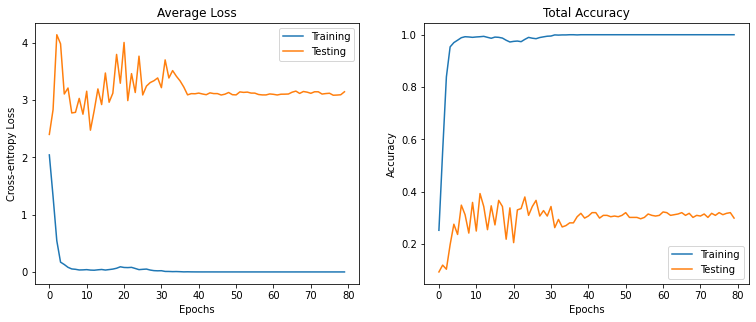

In [24]:
def plot_result(config, train_loss_record, test_loss_record, train_acc_record, test_acc_record):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6.4*2, 4.8))
    axes = axes.flatten()

    axes[0].set_title('Average Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Cross-entropy Loss')
    axes[0].plot(train_loss_record, label='Training')
    axes[0].plot(test_loss_record, label='Testing')
    axes[0].legend()

    axes[1].set_title('Total Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].plot(train_acc_record, label='Training')
    axes[1].plot(test_acc_record, label='Testing')
    axes[1].legend()

    plt.show()

    return 

config = None
for i in range(len(train_acc_record)):
    train_acc_record[i] = train_acc_record[i].item()
    test_acc_record[i] = test_acc_record[i].item()

plot_result(config, train_loss_record, test_loss_record, train_acc_record, test_acc_record)


## (b) Remove the identity mapping and repeat (a), then do some discussion on the results of (a) and (b). Please describe what you found. (5%)


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResNetBlock_no_identity(nn.Module):
    def __init__(self, in_ch, out_ch, stride=1):
        super(ResNetBlock_no_identity, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_ch)
        )

    def forward(self, x):
        out = self.block(x)
        out = F.relu(out)
        return out

class ResNet_no_identity(nn.Module):
    def __init__(self, ResNetBlock_no_identity, num_classes=10):
        super(ResNet_no_identity, self).__init__()
        self.in_ch = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        self.layer1 = self.make_layer(ResNetBlock_no_identity, 64,  2, stride=1)
        self.layer2 = self.make_layer(ResNetBlock_no_identity, 128, 2, stride=2)
        self.layer3 = self.make_layer(ResNetBlock_no_identity, 256, 2, stride=2)
        self.layer4 = self.make_layer(ResNetBlock_no_identity, 512, 2, stride=2)
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)   #strides=[1,1]
        layers = []
        for stride in strides:
            layers.append(block(self.in_ch, channels, stride))
            self.in_ch = channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


def ResNet18_no_identity():

    return ResNet_no_identity(ResNetBlock_no_identity)

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print('device: ',device)

resnet18 = ResNet18_no_identity().to(device)
resnet18.device = device

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.0003, weight_decay=1e-5)

n_epochs = 80

train_loss_record = []
test_loss_record = []
train_acc_record = []
test_acc_record = []

for epoch in range(n_epochs):
    # Training
    resnet18.train()

    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        imgs, labels = batch
        logits = resnet18(imgs.to(device))

        loss = criterion(logits, labels.to(device))
        optimizer.zero_grad()
        loss.backward()
        grad_norm = nn.utils.clip_grad_norm_(resnet18.parameters(), max_norm=10)
        optimizer.step()

        acc = (logits.argmax(dim=-1) == labels.to(device)).float().mean()

        train_loss.append(loss.item())
        train_accs.append(acc)

    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_record.append(train_loss)
    train_acc_record.append(train_acc)

    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] loss = {train_loss:.5f}, acc = {train_acc:.5f}")

    # Testing
    resnet18.eval()

    test_loss = []
    test_accs = []

    for batch in tqdm(test_loader):
        imgs, labels = batch
        with torch.no_grad():
          logits = resnet18(imgs.to(device))

        loss = criterion(logits, labels.to(device))
        acc = (logits.argmax(dim=-1) == labels.to(device)).float().mean()

        test_loss.append(loss.item())
        test_accs.append(acc)

    test_loss = sum(test_loss) / len(test_loss)
    test_acc = sum(test_accs) / len(test_accs)
    test_loss_record.append(test_loss)
    test_acc_record.append(test_acc)

    print(f"[ Test | {epoch + 1:03d}/{n_epochs:03d} ] loss = {test_loss:.5f}, acc = {test_acc:.5f}")


device:  cuda


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 001/080 ] loss = 2.18642, acc = 0.21402


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 001/080 ] loss = 2.31221, acc = 0.09375


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 002/080 ] loss = 1.82087, acc = 0.32244


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 002/080 ] loss = 2.37581, acc = 0.11198


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 003/080 ] loss = 1.42827, acc = 0.48745


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 003/080 ] loss = 2.32157, acc = 0.33854


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 004/080 ] loss = 0.90157, acc = 0.69768


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 004/080 ] loss = 2.19509, acc = 0.22656


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 005/080 ] loss = 0.53779, acc = 0.83239


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 005/080 ] loss = 2.90073, acc = 0.23698


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 006/080 ] loss = 0.29471, acc = 0.91951


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 006/080 ] loss = 2.95105, acc = 0.24479


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 007/080 ] loss = 0.22211, acc = 0.93726


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 007/080 ] loss = 2.82086, acc = 0.23698


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 008/080 ] loss = 0.16690, acc = 0.95099


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 008/080 ] loss = 2.75306, acc = 0.28646


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 009/080 ] loss = 0.19424, acc = 0.94010


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 009/080 ] loss = 2.45345, acc = 0.29688


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 010/080 ] loss = 0.14939, acc = 0.95810


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 010/080 ] loss = 2.74197, acc = 0.30208


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 011/080 ] loss = 0.16021, acc = 0.94934


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 011/080 ] loss = 3.15832, acc = 0.25521


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 012/080 ] loss = 0.16772, acc = 0.95526


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 012/080 ] loss = 2.81667, acc = 0.29948


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 013/080 ] loss = 0.14026, acc = 0.95312


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 013/080 ] loss = 2.78492, acc = 0.28125


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 014/080 ] loss = 0.13400, acc = 0.96046


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 014/080 ] loss = 2.92008, acc = 0.30729


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 015/080 ] loss = 0.10163, acc = 0.96899


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 015/080 ] loss = 2.62220, acc = 0.36979


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 016/080 ] loss = 0.10933, acc = 0.96283


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 016/080 ] loss = 3.38544, acc = 0.24219


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 017/080 ] loss = 0.12593, acc = 0.95833


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 017/080 ] loss = 3.84630, acc = 0.20833


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 018/080 ] loss = 0.13100, acc = 0.95526


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 018/080 ] loss = 2.98422, acc = 0.27604


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 019/080 ] loss = 0.13814, acc = 0.95384


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 019/080 ] loss = 3.42080, acc = 0.26302


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 020/080 ] loss = 0.10843, acc = 0.96828


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 020/080 ] loss = 3.38400, acc = 0.26042


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 021/080 ] loss = 0.10662, acc = 0.96165


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 021/080 ] loss = 2.64867, acc = 0.36458


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 022/080 ] loss = 0.09216, acc = 0.97064


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 022/080 ] loss = 2.92528, acc = 0.30208


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 023/080 ] loss = 0.06805, acc = 0.97988


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 023/080 ] loss = 3.19193, acc = 0.27344


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 024/080 ] loss = 0.08124, acc = 0.97538


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 024/080 ] loss = 3.25195, acc = 0.29688


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 025/080 ] loss = 0.08941, acc = 0.96946


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 025/080 ] loss = 2.74895, acc = 0.33594


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 026/080 ] loss = 0.06663, acc = 0.98153


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 026/080 ] loss = 3.34513, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 027/080 ] loss = 0.06302, acc = 0.98153


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 027/080 ] loss = 2.91253, acc = 0.33854


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 028/080 ] loss = 0.05362, acc = 0.98390


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 028/080 ] loss = 2.89897, acc = 0.28385


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 029/080 ] loss = 0.07360, acc = 0.97751


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 029/080 ] loss = 3.00118, acc = 0.34375


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 030/080 ] loss = 0.08557, acc = 0.96544


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 030/080 ] loss = 2.82620, acc = 0.38802


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 031/080 ] loss = 0.07676, acc = 0.97301


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 031/080 ] loss = 3.27421, acc = 0.35417


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 032/080 ] loss = 0.06722, acc = 0.97798


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 032/080 ] loss = 3.04084, acc = 0.36719


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 033/080 ] loss = 0.05723, acc = 0.98461


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 033/080 ] loss = 3.35378, acc = 0.34896


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 034/080 ] loss = 0.06026, acc = 0.98201


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 034/080 ] loss = 3.17969, acc = 0.36458


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 035/080 ] loss = 0.04311, acc = 0.99006


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 035/080 ] loss = 3.50701, acc = 0.26302


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 036/080 ] loss = 0.05552, acc = 0.98366


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 036/080 ] loss = 3.45165, acc = 0.29948


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 037/080 ] loss = 0.03013, acc = 0.99100


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 037/080 ] loss = 3.11333, acc = 0.36198


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 038/080 ] loss = 0.02490, acc = 0.99503


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 038/080 ] loss = 3.35378, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 039/080 ] loss = 0.04500, acc = 0.98580


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 039/080 ] loss = 3.33358, acc = 0.33594


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 040/080 ] loss = 0.02576, acc = 0.99432


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 040/080 ] loss = 3.14763, acc = 0.34635


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 041/080 ] loss = 0.04073, acc = 0.98769


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 041/080 ] loss = 3.57548, acc = 0.30729


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 042/080 ] loss = 0.05859, acc = 0.98059


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 042/080 ] loss = 3.82770, acc = 0.24479


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 043/080 ] loss = 0.08081, acc = 0.97917


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 043/080 ] loss = 3.21922, acc = 0.33073


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 044/080 ] loss = 0.06932, acc = 0.97822


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 044/080 ] loss = 3.32821, acc = 0.35938


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 045/080 ] loss = 0.08513, acc = 0.97301


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 045/080 ] loss = 3.39654, acc = 0.32552


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 046/080 ] loss = 0.06266, acc = 0.97940


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 046/080 ] loss = 3.02126, acc = 0.34635


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 047/080 ] loss = 0.04574, acc = 0.98887


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 047/080 ] loss = 2.77601, acc = 0.40625


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 048/080 ] loss = 0.03791, acc = 0.98887


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 048/080 ] loss = 3.04054, acc = 0.33594


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 049/080 ] loss = 0.04626, acc = 0.98651


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 049/080 ] loss = 3.14710, acc = 0.35417


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 050/080 ] loss = 0.06370, acc = 0.98035


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 050/080 ] loss = 3.37282, acc = 0.31250


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 051/080 ] loss = 0.04952, acc = 0.98580


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 051/080 ] loss = 3.48369, acc = 0.31510


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 052/080 ] loss = 0.06411, acc = 0.98224


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 052/080 ] loss = 3.62922, acc = 0.27083


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 053/080 ] loss = 0.05243, acc = 0.98295


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 053/080 ] loss = 3.83408, acc = 0.26302


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 054/080 ] loss = 0.08446, acc = 0.97798


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 054/080 ] loss = 3.72196, acc = 0.26562


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 055/080 ] loss = 0.07710, acc = 0.97538


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 055/080 ] loss = 3.83528, acc = 0.29948


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 056/080 ] loss = 0.04906, acc = 0.98603


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 056/080 ] loss = 3.53323, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 057/080 ] loss = 0.02717, acc = 0.99148


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 057/080 ] loss = 3.69915, acc = 0.30729


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 058/080 ] loss = 0.02990, acc = 0.99100


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 058/080 ] loss = 3.63334, acc = 0.33073


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 059/080 ] loss = 0.03677, acc = 0.99100


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 059/080 ] loss = 3.21250, acc = 0.33333


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 060/080 ] loss = 0.03344, acc = 0.99124


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 060/080 ] loss = 3.18362, acc = 0.29427


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 061/080 ] loss = 0.02022, acc = 0.99432


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 061/080 ] loss = 3.23559, acc = 0.34115


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 062/080 ] loss = 0.01523, acc = 0.99574


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 062/080 ] loss = 3.00969, acc = 0.35417


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 063/080 ] loss = 0.01125, acc = 0.99716


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 063/080 ] loss = 3.08224, acc = 0.32292


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 064/080 ] loss = 0.00358, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 064/080 ] loss = 2.88612, acc = 0.38542


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 065/080 ] loss = 0.00537, acc = 0.99811


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 065/080 ] loss = 2.96837, acc = 0.38542


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 066/080 ] loss = 0.00478, acc = 0.99858


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 066/080 ] loss = 3.24380, acc = 0.35417


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 067/080 ] loss = 0.00318, acc = 1.00000


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 067/080 ] loss = 3.27942, acc = 0.35677


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 068/080 ] loss = 0.01026, acc = 0.99740


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 068/080 ] loss = 3.30410, acc = 0.32552


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 069/080 ] loss = 0.00571, acc = 0.99929


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 069/080 ] loss = 3.44337, acc = 0.31771


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 070/080 ] loss = 0.02500, acc = 0.99408


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 070/080 ] loss = 3.28777, acc = 0.35938


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 071/080 ] loss = 0.02880, acc = 0.99313


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 071/080 ] loss = 3.39393, acc = 0.33073


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 072/080 ] loss = 0.02513, acc = 0.99148


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 072/080 ] loss = 3.34941, acc = 0.36979


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 073/080 ] loss = 0.03958, acc = 0.98911


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 073/080 ] loss = 3.79172, acc = 0.33854


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 074/080 ] loss = 0.03732, acc = 0.99053


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 074/080 ] loss = 3.45190, acc = 0.30990


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 075/080 ] loss = 0.04422, acc = 0.98414


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 075/080 ] loss = 3.49410, acc = 0.32292


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 076/080 ] loss = 0.04166, acc = 0.98319


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 076/080 ] loss = 3.50749, acc = 0.32031


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 077/080 ] loss = 0.04328, acc = 0.98580


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 077/080 ] loss = 3.83434, acc = 0.32292


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 078/080 ] loss = 0.04583, acc = 0.98816


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 078/080 ] loss = 4.01214, acc = 0.29688


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 079/080 ] loss = 0.04326, acc = 0.98580


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 079/080 ] loss = 3.79976, acc = 0.33854


  0%|          | 0/11 [00:00<?, ?it/s]

[ Train | 080/080 ] loss = 0.03365, acc = 0.98864


  0%|          | 0/3 [00:00<?, ?it/s]

[ Test | 080/080 ] loss = 3.23829, acc = 0.38542


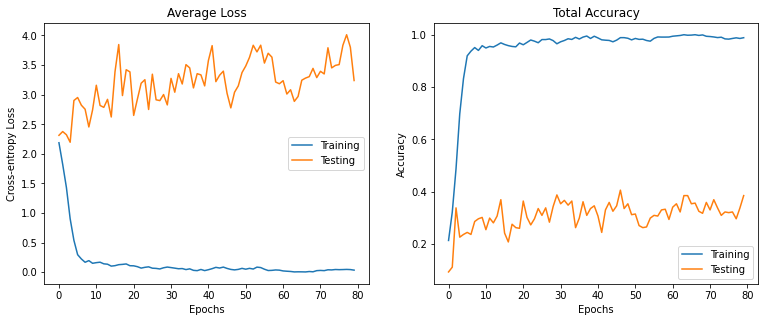

In [13]:
def plot_result(config, train_loss_record, test_loss_record, train_acc_record, test_acc_record):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6.4*2, 4.8))
    axes = axes.flatten()

    axes[0].set_title('Average Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Cross-entropy Loss')
    axes[0].plot(train_loss_record, label='Training')
    axes[0].plot(test_loss_record, label='Testing')
    axes[0].legend()

    axes[1].set_title('Total Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].plot(train_acc_record, label='Training')
    axes[1].plot(test_acc_record, label='Testing')
    axes[1].legend()

    plt.show()

    return 

config = None
for i in range(len(train_acc_record)):
    train_acc_record[i] = train_acc_record[i].item()
    test_acc_record[i] = test_acc_record[i].item()

plot_result(config, train_loss_record, test_loss_record, train_acc_record, test_acc_record)


**Ans**:
在拿掉identity mapping之後，由於經過多層conv層有可能會將原本圖片的分布改變，因次在不加入原本資料x的identity的情況下，每一層可能讀入的資料分布都不太一樣。這樣在訓練的時候可以看到在testing階段不論是loss或acc都表現出不穩定、難以收斂的情況。